# Plotting With Python

This notebook will show you how to make many of the common plots you will encounter using the matplotlib library, as well as some more advanced things. After working through this notebook, you should be able to make some basic plots that look decent and show your data well. 

# Table of Contents

* [Getting Set Up](#Getting-Set-Up)
* [The Basics](#The-Basics)
* [Simple Plotting](#Simple-Plotting)
* [Object-oriented plotting](#Object-oriented-plotting)
* [Labels, limits, and annotations](#Labels,-limits,-and-annotations)
* [Other types of plots](#Other-types-of-plots)
    * [Histogram](#Histogram)
    * [Scatter](#Scatter-plots)
    * [Error Bars](#Error-bars)
* [Multiple Plots](#Multiple-plots)
* [Colorbars](#Colorbars)
* [Saving Plots](#Saving-Plots)



## Getting Set Up

You will first need to have a working copy of matplotlib on your computer. The GEG computers should have them already, so this shouldn't be a problem. If it isn't, one of the scientific python distributions, like Anaconda or Canopy, will have it. You can install it via pip, with `pip install matplotlib`. If none of those work, [here's matplotlib's documentation on how to install.](http://matplotlib.org/users/installing.html)

We will also use numpy in this tutorial. It is available in the same ways as matplotlib is.

This tutorial is an IPython notebook, so if you are viewing this on the web via nbviewer and want to work throught the plots yourself (and that is a very useful thing to do!), you can download the files from [here](https://github.com/gillenbrown/PythonTutorial). Then open the file with an IPython notebook. If you aren't familiar with IPython notebooks, check out [this tutorial](http://nbviewer.ipython.org/github/gillenbrown/PythonTutorial/blob/master/IPython.ipynb) first.

It will probably be most helpful to have this open in both IPython notebook and the static version via nbviewer. That way you can mess around with the plots all you want, while still being able to look at the original (via nbviewer). It will allow you to see what the plots originally were if you mess something up horribly.

## The Basics

[Matplotlib](http://matplotlib.org/index.html) is the most-used plotting library for python. It can make pretty much any plot imaginable. 

To import matplotlib into a python script or notebook, call

In [1]:
import matplotlib.pyplot as plt

This will import only the important stuff for plotting, and will be good enough for most of your plots. Matplotlib has many other packages that aren't needed for most plots, while pyplot is the one that contains all the core plotting functionality. We import it as `plt` to save keystrokes. Almost everyone imports it as `plt`, so it's best to use that, in order to be consistent and understandable to others who may see your work.

If you are using an IPython notebook, you can have your plots show up inside the notebook by running the 

In [2]:
%matplotlib inline

command. This is super useful.

We will also import numpy (a python library focused on numerical computing) to help us create the datasets we will plot later.

In [3]:
import numpy as np

Again, we call it `np` to save keystrokes, and again that is the name everyone else uses for it.

# Simple Plotting

In general, matplotlib plots can be made with very simple function calls. The functions have many optional parameters you can use to control the appearance of the plot. In this tutorial we will start by doing the simplest things, then introducing the relevent parameters.

We will start with the simplest plot in matplotlib. We first need to make some data. We will make 3 "functions": $y=3x$, $y=x^2$, and $y=x$. 

In [4]:
xs = np.arange(0, 5, 0.5)
y1 = [x*3 for x in xs]
y2 = [x**2 for x in xs]
y3 = [x for x in xs]

Now to plot it. The matplotlib command is simply `plt.plot()`. It takes many parameters, but the first two will always be a list of x values, and a list of y values, like we created above. To plot multiple things, we just call the function multiple times.

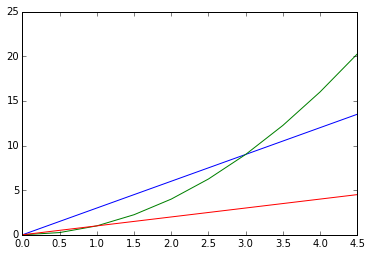

In [5]:
plt.plot(xs, y1)
plt.plot(xs, y2)
plt.plot(xs, y3);

A couple things to note: Matplotlib automatically changes the color of each line, so they are distinguishable. It also automatically adjusts the axis limits to match our dataset. 

This was obviously a simple plot, and there are some many more detailed things we can do with matplotlib. The plot function can take many keyword parameters that specify all kinds of stuff about the line to be plotted. Here is a plot with a few of those more detailed options used.

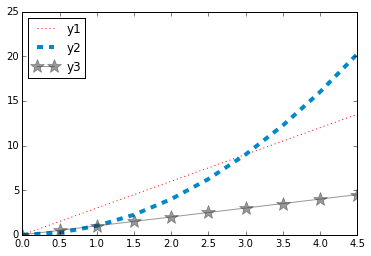

In [6]:
plt.plot(xs, y1, color="r", linestyle=":", label="y1")
plt.plot(xs, y2, color="#0088CC", linestyle="--", linewidth=4, label="y2")
plt.plot(xs, y3, color=(0.2, 0.2, 0.2), marker="*", markersize=15, alpha=0.5, label="y3")
plt.legend(loc=0);

This obviously isn't a plot designed to look good, but rather one to explain a lot of the parameters matplotlib can take. The [documentation for the matplotlib plot function](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) has desciptions for all the possible things, so glance through that if you are interested.

* `color`: color of the points. You can specify colors directly, like `r` for red, `g` for green, `k` for black, etc. Matplotlib also knows the names for many colors, so if you ever need to plot something in chartreuse matplotlib has you covered. I'm serious, try changing one of the colors to `chartreuse`, and it will work. You can also pass in hex values, like the second line, or tuples of rgb values like the third.
* `linestyle`: This describes the format of the lines. The defulat is solid `-`, but there is also `--` for dashed, `:` for dotted, and `-.` for dot-dash.
* `label`: This tells what the title of each line should be in the legend.
* `linewidth`: pretty self explanatory. The larger the number, the thicker the line.
* `marker`: If you want to add individual points on the line, this can be used to specify the shape of the markers. There are a [bazillion options](http://matplotlib.org/api/markers_api.html#module-matplotlib.markers).
* `markersize`: again self explanatory. The larger the markersize, the larger the marker will be.
* `alpha`: This sets the transparency of the points or line. 1 is opaque, 0 is invisible. You can see how the gray stars are transparent, and you can see the blue line beneath. This is especially useful in scatter plots when you have lots of overlapping points. 

The legend is added with the simple `plt.legend()` call. The `loc=0` tells matplotlib to find the best location to put the legend. You can specify other things to put the legend in a specific place, but `loc=0` is often the most useful. [Here is the `legend()` documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend), with a list of all the places you can put a legend. There are also a ton of other parameters that you can use to make a prettier legend.

These are just some of the parameters. To make nice looking plots, you might need to take some time to really fine tune things. Try changing some of the parameters above, then rerun the plot to really see how your changes affect the plot. Remember that when you rerun the cell with the plotting code, you don't need to rerun the code that we used to define our lists. Things done in earlier code stay in memory. This is why IPython notebooks are so awesome. If you have to do a lot of work to do some data analysis, you don't need to do that every time you want to remake your plot.



# Object-oriented plotting

Before we get into the many other types of plots matplotlib can create, we should talk about object-oriented plotting. It is the way to gain increased control over your plots. We'll replicate the last plot using the object oriented syntax, then show a few ways to change things that aren't possible otherwise. 

First, matplotlib is based on figures and axes. Figures are basically the whole plot area, and hold axes, which are what we plot on. We can make a figure and axes many ways, but the easiest is with `plt.subplots()` function, which returns both a figure and axes. We then can call our normal `plot()` function, but call it on the axes objects, since that is what we will plot on. The syntax is exactly the same otherwise.

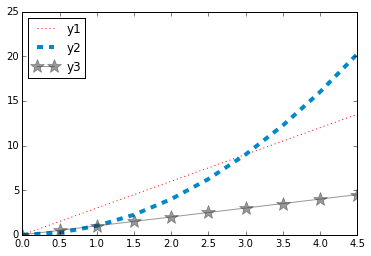

In [7]:
fig, ax = plt.subplots()
ax.plot(xs, y1, color="r", linestyle=":", label="y1")
ax.plot(xs, y2, color="#0088CC", linestyle="--", linewidth=4, label="y2")
ax.plot(xs, y3, color=(0.2, 0.2, 0.2), marker="*", markersize=15, alpha=0.5, label="y3")
ax.legend(loc=0);

This seems like more trouble for no gain, but having the axes objects to modify is super helpful. We can also get other objects to modify.

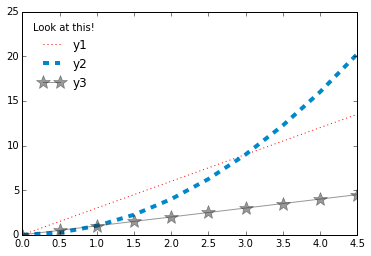

In [8]:
fig, ax = plt.subplots()
ax.plot(xs, y1, color="r", linestyle=":", label="y1")
ax.plot(xs, y2, color="#0088CC", linestyle="--", linewidth=4, label="y2")
ax.plot(xs, y3, color=(0.2, 0.2, 0.2), marker="*", markersize=15, alpha=0.5, label="y3")
legend = ax.legend(loc=0)
legend.set_title("Look at this!")
legend.set_frame_on(False)

Don't worry about the specifics of those calls. The key point is that the object-oriented syntax gives more control than the `plt.` method. Using the object oriented syntax is also necessary if you want a plot with subplots in it. I'll use the oo method throughout the rest of the tutorial, even though it probably isn't necessary.

# Labels, limits, and annotations 

Adding x and y labels is obviously important, as it changing the bounds of the plot. It's simple to do, though.

I'll make some data that has an outlier that destroys the bounds of the plot if they are set automatically.

In [9]:
xs = np.arange(0, 10, 0.1)
y = [np.sin(x) for x in xs]
y[15] = 100  # change a value in the middle

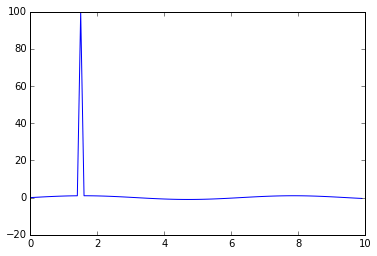

In [10]:
fig, ax = plt.subplots()
ax.plot(xs, y);

We want to change the limits, to make the plot useful again. We'll also add some labels while we're at it. Notice how since ax has already been defined, we can just use it here. We need to call fig to get it to display, though, since we already displayed it earlier.

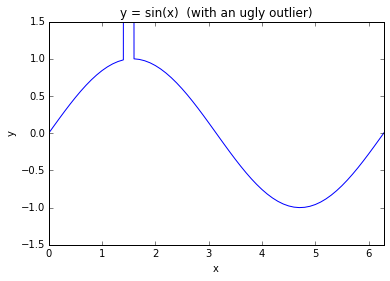

In [11]:
ax.set_ylim([-1.5, 1.5])
ax.set_xlim([0, 2*3.14])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("y = sin(x)  (with an ugly outlier)")
fig

When setting limits on axes, the function takes a list of the lower and upper limits you want on that axis. 

We can also make our labels/title have LaTeX formatting, simply by surrounding the desired text in `r"$ $"`.

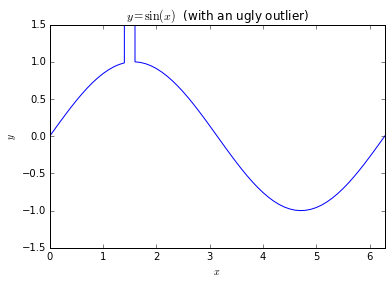

In [12]:
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title(r"$y = \sin(x)$  (with an ugly outlier)")
fig

Any valid LaTeX math will work inside the `r"$ $"`. The `r` tells Python it is a raw string, which lets you use backslashes properly. 

We can also add annotations to our plot inside the axes. We can specify a location based on either data coordinates, or fraction of the axes. We will put text at (4, 1), as well as 70% of the way across and 50% up. That `transform=ax.transAxes` is what makes things be in axes coords, rather than data coords.

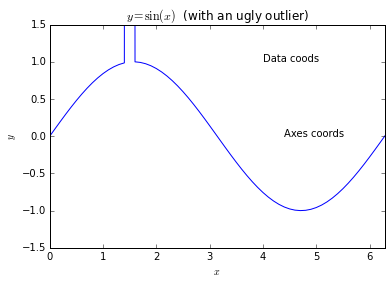

In [13]:
ax.text(x=4, y=1, s="Data coods")  # data coords
ax.text(x=0.7, y=0.5, s="Axes coords", transform=ax.transAxes)  # axes coords
fig

Adding a grid to the plot is also very easy.

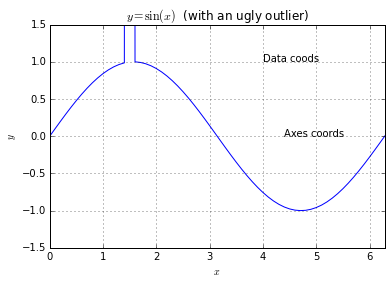

In [14]:
ax.grid()
fig

# Other types of plots

There are a ton of types of plots that matplotlib can produce, but I'll only cover some of the more important ones. I will show a basic plot, then dive deep into the many ways we can modify the plot. Don't get overwhelmed at the many parameters the plotting functions can take. The [documentation](http://matplotlib.org/api/axes_api.html#matplotlib.axes) is your friend when plotting. Searching the page for what you want is the best way to find things.

I also won't worry about making the plots look pretty for most of it. Matplotlib's default plots are often super ugly, so be ready. At the end of each section I'll make one nice looking plot of that type.

Throughout, please change the various parameters, try plotting new data, and mess with things in other ways. It's the best way to figure out what's really going on. Since this is an IPython notebook, it's easy to mess around in a constructive way.

## [Histogram](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.hist)

We'll first sample a Gaussian using numpy...

In [15]:
data = np.random.normal(loc=0, scale=2.0, size=10000)

...then plot that data in a histogram.

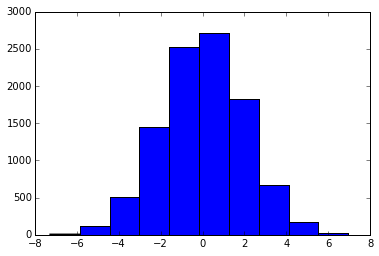

In [16]:
plt.hist(data);

Of course, there are a ton of parameter we can pass to change the style.

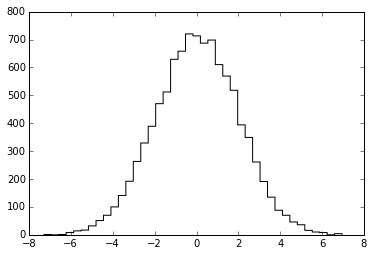

In [17]:
plt.hist(data, bins=40, histtype='step', color="k", align="mid");

* `bins`: How many bins there are. Can also be passed a list of edges to specify your own bins. This is often needed, as matplotlib is crappy at making good bins. 
* `histtype`: Can be `bars`, which is the default, `step`, which shows just the outline, or `stepfilled`, which is like step but is filled underneath.
* `align`: Whether the bins are shown centered on the `left`, middle (`mid`), or `right` of their bin. `mid` is the default.

If we want uneven bins, specify a list of edges.

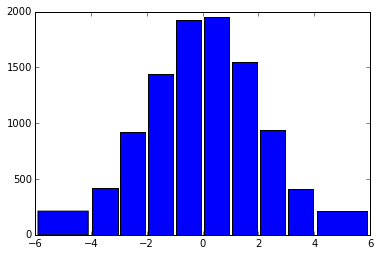

In [18]:
plt.hist(data, bins=[-6, -4, -3, -2, -1, 0, 1, 2, 3, 4, 6], rwidth=0.9);

* `rwidth`: Width of the bars relative to their bin. `0.9` means they take up 90% of the space. 

A cumulative histogram is easy to make, and so is a histogram with a log axis.

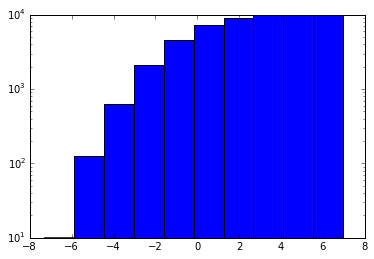

In [19]:
plt.hist(data, cumulative=True, log=True);

A relative frequency histogram is harder to make. There is an option for `normed`, but it sets it so that the integral under the curve is equal to 1. That isn't the same as a normalized histogram, unfortunately. We have to use the `weights` parameter.
* `weights`: It tells how much each value contributes to the total. It takes a list, which has to be the same length as the data to plot. Each value in `weights` tells how much the corresponding value contributes.

To make a relative frequency histogram, we need to make a list where each value is $1/$`len(data)`.

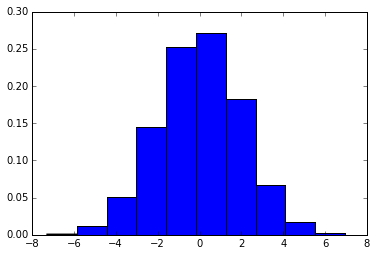

In [20]:
weights = [1.0 / len(data)] * len(data)  # make a one element list, and repeat it len(data) times
plt.hist(data, weights=weights);

Lastly, here's how I would make a histogram look nice.

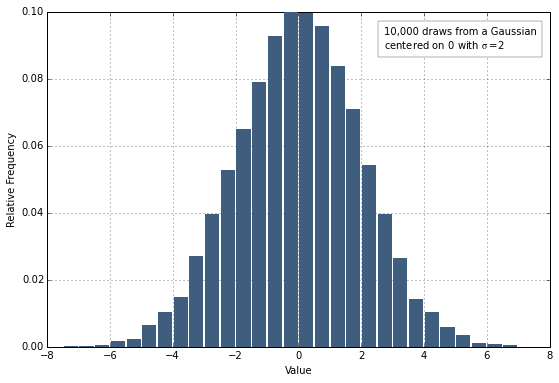

In [21]:
fig, ax = plt.subplots(figsize=[9, 6])
bins = np.arange(-8, 9, 0.5)
ax.hist(data, weights=weights, bins=bins, rwidth=0.9, color='#3F5D7D', linewidth=0, zorder=3)
ax.grid()
ax.set_xlabel("Value")
ax.set_ylabel("Relative Frequency")
ax.set_xlim([-8, 8])
ax.text(x=0.67, y=0.89, s="10,000 draws from a Gaussian \ncentered on 0 with $\mathregular{\sigma = 2}$",
        bbox=dict(facecolor='white', linewidth=0.3, pad=12), transform=ax.transAxes);

Some explanation for parameters I haven't explained yet:
* `figsize`: This is a two element list that gives the width and height of the figure. It's supposedly in inches, but I normally just pick whatever looks good.
* `linewidth`: controls the width of the line that borders each bar.
* `zorder`: controls which elements are on top of each other. An element will be on top of all objects that have a lower `zorder`. I used that since my grid was initially on top of the bars. Adding the `zorder = 3` fixed that.
* In the LaTeX format, `\mathregular{}` is used to get the text to be in the same font as everything else. This is especially useful for power stuff, like $10^3$, that would look much better in the same font, rather than sticking out when put in LaTeX font.
* `bbox`: This a a complicated one that I don't fully understand myself. It's basically a way to control the box that a text element like `text` or `legend` sits in. The `dict` portion is used because there are many properties of `bbox`. The parameter `pad` determines how much space is between the border and the text. 

Again, try changing the parameters in that plot to see how it changes things. 

## [Scatter plots](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.scatter)

We will start by making the data, which will be a couple of overlapping 2D Gaussians...

In [22]:
x1 = np.random.normal(0, 2, 1000)
y1 = np.random.normal(0, 2, 1000)
x2 = np.random.normal(4, 2, 1000)
y2 = np.random.normal(4, 2, 1000)
x3 = np.random.normal(8, 2, 1000)
y3 = np.random.normal(8, 2, 1000)

and plotting it. The call for scatter is simply `scatter()`. 

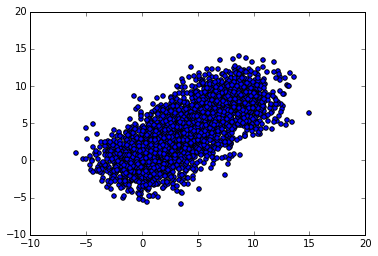

In [23]:
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.scatter(x3, y3);

Scatter plots are one area where the default matplotlib implementation really sucks. The points are opaque, all the same color by default, and have a big border. We can change those things pretty easily, but first lets demonstrate the parameters we can change.

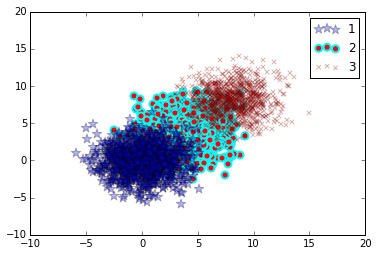

In [24]:
plt.scatter(x1, y1, s=100, marker="*", alpha=0.3, label="1")
plt.scatter(x2, y2, s=50, c="r", linewidth=2, edgecolor='cyan', label="2", zorder=0)
plt.scatter(x3, y3, color="maroon", alpha=0.3, marker="x", label="3")
plt.legend();

Yep, it's pretty ugly. Here are the parameters I used there:
* `s`: size of the points. It describes area, not radius, so large points need a very large number here.
* `marker`: The marker that will be used for each point. The full list of options is [here](http://matplotlib.org/api/markers_api.html#module-matplotlib.markers). There are a lot.
* `alpha`: opacity of the points. 0 is invisible, 1 is opaque. Nowhere is this more useful than on scatter plots.
* `c`: color. This describes only the color of the center, not the color of the border.
* `color`: like `c`, but also controls the color of the border. Yeah, this is weird. If you don't believe me, change linewidth to some humongous value, and test `c` vs `color`.
* `edgecolor`: this will change the color of the border of the points, as long as `linewidth` is not 0.
* `linewidth`: width of the border of the points.

Let's stop making ugly plots, though, and make something more acceptable.

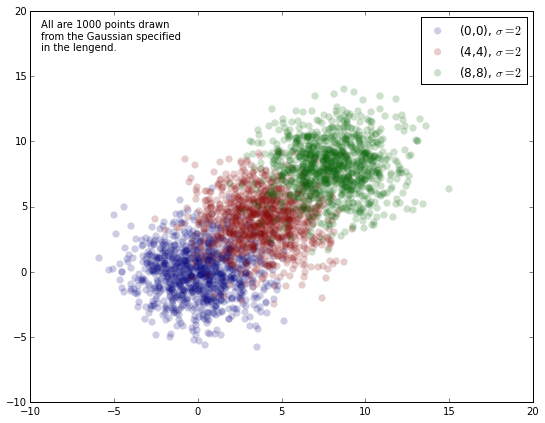

In [25]:
linewidth = 0.1
size = 50
alpha = 0.2
fig, ax = plt.subplots(figsize=[9, 7])
ax.scatter(x1, y1, s=size, c="navy", alpha=alpha, linewidth=linewidth, label="(0,0), $\sigma=2$")
ax.scatter(x2, y2, s=size, c="darkred", alpha=alpha, linewidth=linewidth, label="(4,4), $\sigma=2$")
ax.scatter(x3, y3, s=size, c="darkgreen", alpha=alpha, linewidth=linewidth, label="(8,8), $\sigma=2$")
ax.text(x=0.02, y=0.9, transform=ax.transAxes, s="All are 1000 points drawn \nfrom the Gaussian specified \n"
                                                "in the lengend.")
ax.legend(scatterpoints=1);

There is only one new thing here.
* `scatterpoints`: The number of example points to put in the legend.

## [Error bars](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.errorbar)

Errorbar plots are some of the most important, and a basic plot is pretty easy.

We will start by making random data, then plotting it, as we always do.

In [26]:
size=50
xs = np.random.uniform(low=-5, high=5, size=size)
ys = np.random.uniform(low=-5, high=5, size=size)
x_err = np.random.uniform(low=0.5, high=1, size=size)
y_err = np.random.uniform(low=0.5, high=1, size=size)

To plot errorbars, we call `plt.errorbar()`. The first two arguments are x and y (as they normally are), and then x and y error can be specified.

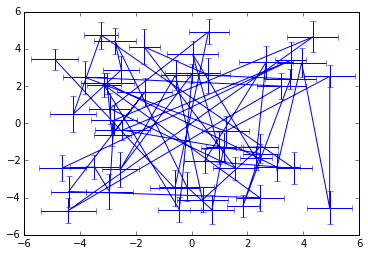

In [27]:
plt.errorbar(xs, ys, xerr=x_err, yerr=y_err);

This probably wasn't what we were looking for. Let's use some parameters to clean it up.

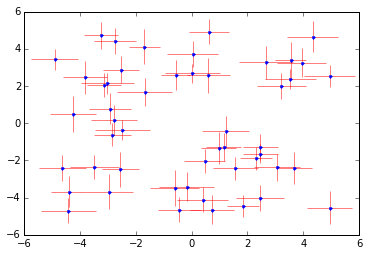

In [28]:
plt.errorbar(xs, ys, xerr=x_err, yerr=y_err, fmt=".", capsize=0, ecolor="r", elinewidth=0.5);

* `fmt`: format of the points. `.` specifies a point, but you could specify any valid marker. If you want to keep the line connecting the points, use `.-`, or any valid marker (ie `*-`, `H-`, etc)
* `capsize`: size of the caps on the end of the errobars. Setting this to 0 gets rid of them.
* `ecolor`: color of the errorbars
* `elinewidth`: linewidth of the errorbars.

There are also a bunch of parameters that can control the markers, like we did with scatter.

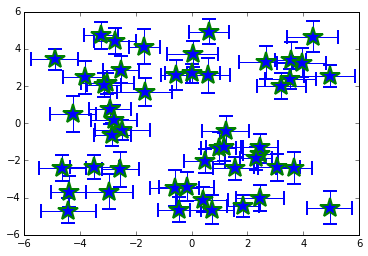

In [29]:
plt.errorbar(xs, ys, xerr=x_err, yerr=y_err, fmt="*", markersize=20, markeredgecolor="g", capsize=7,
             markeredgewidth=2);

Those parameters should all be familiar or be blatantly obvious what they do. Note that weirdly, `markeredgewidth` also controls the width of the caps on the errorbars. `capwidth` can be specified, but it is overrules by `markeredgewidth` if it is provided.

We can also specify lower/upper limits for our points via the `lolims` / `uplims` / `xlolims` / `xuplims` params. When using limits, the length of the arrow is determined by the size of the error in that direction. 

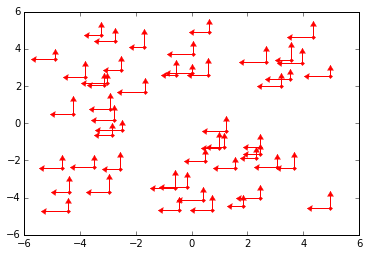

In [30]:
plt.errorbar(xs, ys, xerr=x_err, yerr=y_err, fmt=".", capsize=0, lolims=True, xuplims=True);

Lopsided errobars are also easy. Instead of passing a single array for `xerr` and `yerr`, we pass a list of two lists, which specify lower/upper errors. We'll demonstrate this by quadrupling the errors for lower errors, and keeping the upper errors the same.

In [31]:
lopsided_xerr = [[4*xe for xe in x_err], x_err]
lopsided_yerr = [[4*ye for ye in y_err], y_err]

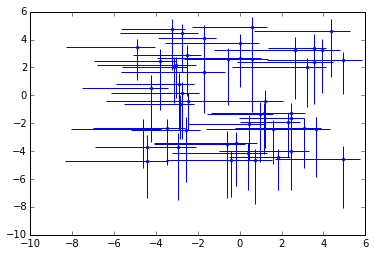

In [32]:
plt.errorbar(xs, ys, xerr=lopsided_xerr, yerr=lopsided_yerr, fmt=".", capsize=0);

Errorbar plots aren't too hard to make look nice, but with a crappy dataset it can be a challenge. `alpha` is nice to use, especially when you have lots of points. I also almost always use `capsize=0`.

In [33]:
x1 = np.random.uniform(low=0, high=10, size=100)
y1 = np.random.normal(loc=6, scale=1, size=100)
y_err1 = np.random.normal(loc=0.5, scale=0.3, size=100)

x2 = np.random.uniform(low=0, high=10, size=100)
y2 = np.random.normal(loc=4, scale=1, size=100)
x_err2 = np.random.normal(loc=0.5, scale=0.3, size=100)

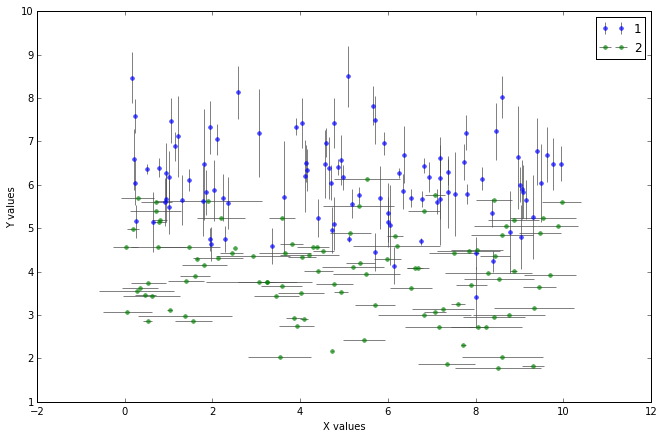

In [34]:
fig, ax = plt.subplots(figsize=[11, 7])
ax.errorbar(x1, y1, yerr=y_err1, c="b", fmt=".", markersize=8, capsize=0, ecolor="0.3", alpha=0.7, label="1") 
ax.errorbar(x2, y2, xerr=x_err2, c="g", fmt=".", markersize=8, capsize=0, ecolor="0.3", alpha=0.7, label="2")
ax.legend()
ax.set_xlabel("X values")
ax.set_ylabel("Y values");

# Multiple plots

There are many times you want to put many things on the same axis. This is where the object oriented syntax comes in especially handy. It's almost trivial to do. All you do is call the plot on the axis you want. I'll just plot a couple of examples, since the point is simple.

### Histogram with overplotted line

I'll basically do the same histogram I did earlier, but with an overplotted line showing a theoretical Gaussian.

I'll first get the sampled Gaussian data.

In [35]:
sigma=2
data = np.random.normal(loc=0, scale=sigma, size=100000)
data_label = "100,000 draws from a \nGaussian with $\mathregular{\sigma = 2}$"

I'll now make the theoretical curve.

In [36]:
xs = np.arange(-10, 10, 0.1)
gaussian = [0.1 * np.e ** (- x**2 / (2 * sigma**2)) for x in xs] 
line_label = "Theoretical Gaussian $\mathregular{\sigma=2}$"

Now we'll do the plotting. There isn't anything new here.

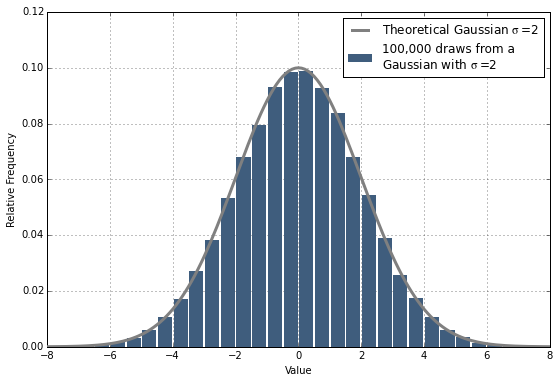

In [37]:
fig, ax = plt.subplots(figsize=[9, 6])

bins = np.arange(-8, 8.5, 0.5)
weights = [1.0 / len(data)] * len(data)

ax.hist(data, bins=bins, weights=weights, rwidth=0.9, color='#3F5D7D', linewidth=0, zorder=3, label=data_label)
ax.plot(xs, gaussian, c="grey", linewidth=3, zorder=4, label=line_label)
ax.grid()
ax.set_xlabel("Value")
ax.set_ylabel("Relative Frequency")
ax.set_xlim([-8, 8])
legend = ax.legend(framealpha=1.0)

### Noisy data with a best fit.

We will start by making some data around the line $y = x$. The noise will be added by sampling from a Gaussian. I will also add errors, which will be sampled from a Gaussian too. It's not too realistic, but will be good enough for this.

In [38]:
xs = np.arange(0, 10, 0.1)
ys = [x + np.random.normal(0, 1.0) for x in xs]
y_errs = [np.random.normal(0.5, 0.2) for x in xs]

There are a ton of ways to get best fit lines. The easist is probably [numpy's `polynomial.polynomial.polyfit` function](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.polynomial.polyfit.html#numpy.polynomial.polynomial.polyfit). It can handle errors. It takes weights, though, so we will use 1/error as our weights. That will make the lowest errors weighted the highest. The parameter `deg` specifies the degree of the polynomial that will be fitted. We will first do a linear fit.

In [39]:
weights = [1.0/err for err in y_errs]
fit = np.polynomial.polynomial.polyfit(x=xs, y=ys, deg=1, w=weights)

The function returns a list of coefficients, with the lowest powers first, to turning that into an actual polynomial isn't too hard. As a side note, if you don't know about `enumerate()` you should [learn about it.](http://stackoverflow.com/a/22171593) It's super helpful for making nice loops.

We will also turn this into a string for our label of the fit. The code is kind of ugly, but makes a LaTeX readable string out of the fit.

In [40]:
fit_ys = [sum(x**power * coeff for power, coeff in enumerate(fit)) for x in xs]

fit_str = "$y="
for power, coeff in enumerate(fit):
    if power == 0:
        fit_str += str(round(coeff, 2)) + "+"
    elif power == 1:
        fit_str += str(round(coeff, 2)) + "x" + "+"
    else:
        fit_str += str(round(coeff, 2)) + "x^{" + str(power) + "}+"
# we need to get rid of that last +, and add the closing $
fit_str = fit_str[:-1] + "$"

We can now plot both our data and its best fit.

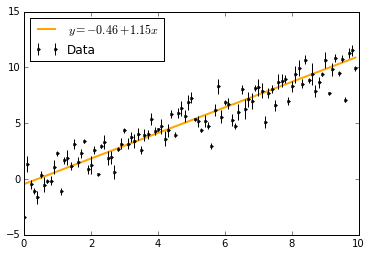

In [41]:
fig, ax = plt.subplots()
ax.plot(xs, fit_ys, c="orange", label=fit_str, linewidth=2, zorder=1)
ax.errorbar(xs, ys, yerr=y_errs, fmt=".", c="k", capsize=0, label="Data", zorder=2)
ax.legend(loc=2);

In a perfect world we would get y=0+x. 

You can try changing the degree of the fit, if you want. The rest of the code will be compatible with it, although the fit string will have some extra + signs if there are negative coefficients.

There are many other methods of fitting in Python, most notably [Scipy's `curve_fit()`](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.optimize.curve_fit.html), which is much more flexible. You'll need to use that if you want to fit a power law, for example. 

There are many other ways to combine plots in this way that are all pretty simple.

# Colorbars

Colobars can be kind of tricky in python, and another time when object oriented plotting is very helpful. They can also work differently in different contexts for different plots, which is no fun.

We'll start by coloring points based on their distance from the origin. In the `scatter()` method, the coloring is built in pretty easily.

In [42]:
xs = np.random.uniform(low=0, high=10, size=100)
ys = np.random.uniform(low=0, high=10, size=100)
dist = [np.sqrt(x**2 + y**2) for x, y in zip(xs, ys)]

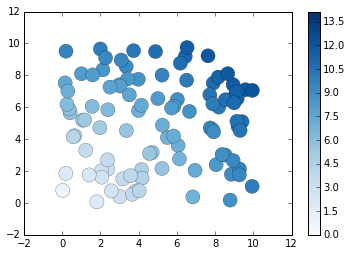

In [43]:
fig, ax = plt.subplots()
scatter = ax.scatter(xs, ys, c=dist, cmap="Blues", vmin=0, vmax=np.sqrt(200), linewidth=0.2, s=200)
fig.colorbar(scatter, ax=ax);

Here is how that works. We pass `scatter()` a list of colors, rather than a single value. The other parameters control how the color works.
* `cmap`: The colormap used to color the points. [Here](http://matplotlib.org/examples/color/colormaps_reference.html) is the list of all valid colormaps. There are a ton. You can also create your own, but I don't know how. 
* `vmin`: The value that will be at the low end of the color scale. This is optional. If you don't pass it, it will pick the lowest value in your dataset. We passed 0, since a point at the origin would be the lowest possible value.
* `vmax`: Like `vmin`, but the highest value. 

We recorded the output of the `scatter` call so we could pass it to the colorbar function, which is called on a figure. It has some parameters, too. [Here is its documentation.](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.colorbar)
* `ax`: Axes object to steal space from to create the colorbar. This is the option you will normally want to use.
* `cax`: Axes object to put the colorbar in. This is useful if you have many subplots, and want the same colorbar for all of them. You will need to create a separate axis for the colorbar, though. See the later section on subplots.

There is a lot more to learn about colorbars, and this is one area where I don't know a lot. If anyone has any things to add, let me know.

# Saving Plots

Plots can be saved in many formats, such as png, pdf, ps, eps and svg. We can eave figures made with both the `.plt` syntax and the object oriented syntax.

We will make two simple plots and save them. The syntax is simply `plt.savefig()` or `fig.savefig()`, depending on which syntax you are using.

In [44]:
xs = np.random.normal(0, 3, 1000)
ys = np.random.normal(0, 3, 1000)

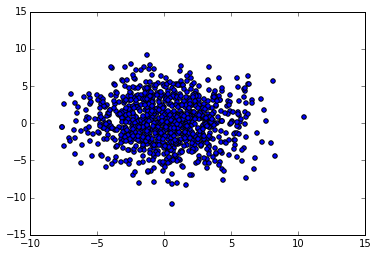

In [45]:
plt.scatter(xs, ys, c="b")
plt.savefig("scatter.png", format="png", dpi=150)

Here are the parameters used:
* The first parameter is the filename for the plot. You can specify a path if you want too.
* `format`: file type that will be made. `"png"` and `"pdf"` are the two I use most often.
* `dpi`: The resolution of the resulting figure, in dots per inch. This is only needed in formats that aren't vector based. If you use `format="pdf"`, you don't need to specify `dpi`.

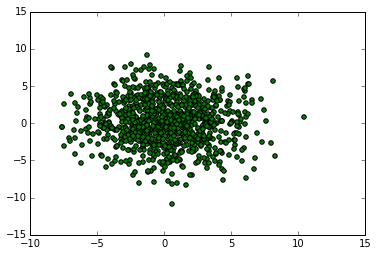

In [46]:
fig, ax = plt.subplots()
ax.scatter(xs, ys, c="g")
fig.savefig("scatter.pdf", format="pdf")

PDFs use vector based graphics, so `dpi` has no effect here. I like using PDFs, since they zoom without any loss of resolution. They look much better than pngs to me.

Things to eventually add:

* log plots
* contour?

* reading from CSV (incorporate astopy stuff)
* horizontal and vertical lines
* prettifying plots: plug prettyplot
* subplots, multiple plots on same page
 * have plot within a plot